## PROJECT - Marketing Campaign for Banking Products

The bank which has a growing customer base. Majority of these customers are liability customers (depositors) with varying
size of deposits. The number of customers who are also borrowers (asset customers) is quite small.So,the management wants 
to explore ways of converting its liability customers to personal loan customers.A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success.

There are 5000 customers.

## GOAL IS
    1. TO sell more personal loan products to bank customer.
    2  To identify the potential customer who have a higher probablity of purchasing the loan.

## Objective - To predict the likelihood of a liability Customer buying Personal Loan.

##  IMPORTING LIBRARIES AND DATASET

In [62]:
#importing  libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score



import matplotlib.pyplot as plt
%matplotlib inline

Reading dataset

In [63]:
df1=pd.read_csv('Bank_Personal_loan_Modelling.csv')

Displaying first 5 rows

In [64]:
df1.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Displaying last 5 rows

In [65]:
df1.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## Attribute Information:

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
  campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
  the bank?
  
● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?

## Check datatype & basic summary stats

Display datatype of each data column


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Summary Stats

In [67]:
df1.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


To display how many null value are present

In [68]:
df1.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Dropping Irrelevent columns 

Dropping ID and Experience columns because In machine learning model, it is necessary to seperate signal 
from the noise.

In [69]:
df1 = df1.drop(['ID','Experience'],axis=1)

In [70]:
df1.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


So, ID and Experience columns has been removed from the dataset.

## Number of unique in each column 

In [71]:
df1.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

## Number of people with zero mortgage

In [72]:
(df1.Mortgage ==0).sum()

3462

## Number of people with zero credit card spending per month

In [73]:
(df1.CCAvg==0).sum()

106

## Value counts of all categorical columns

In the given dataset, Categorical columns are : Family,
                                                CD Account, 
                                                Online,
                                                CreditCard,
                                                Education,
                                                Personal Loan,
                                                Securities Account.

In [74]:
df1.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [75]:
df1['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [76]:
df1.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [77]:
df1['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [78]:
df1['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [79]:
df1.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [80]:
df1.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

##  Univariate and Bivariate analysis: 


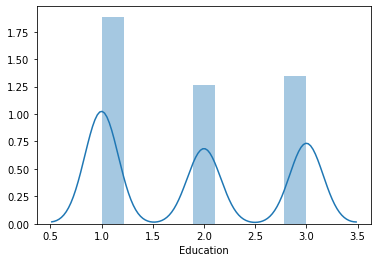

In [81]:
sns.distplot(df1.Education)

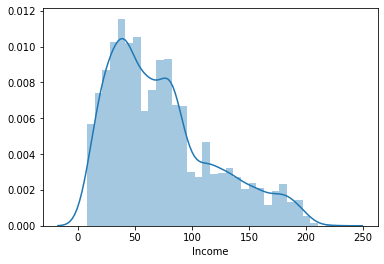

In [82]:
sns.distplot(df1.Income)

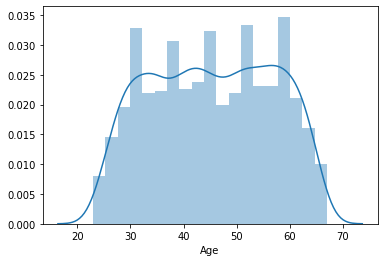

In [83]:
sns.distplot(df1.Age)

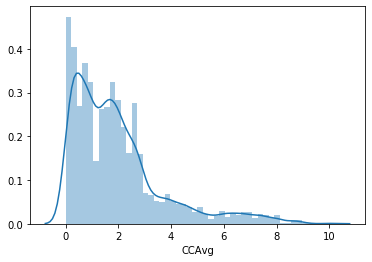

In [84]:
sns.distplot(df1.CCAvg)

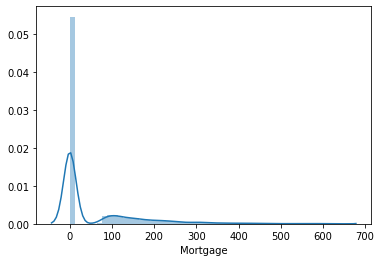

In [85]:
sns.distplot(df1.Mortgage)

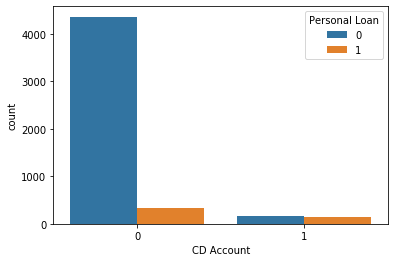

In [86]:
sns.countplot(x='CD Account',data=df1,hue='Personal Loan')

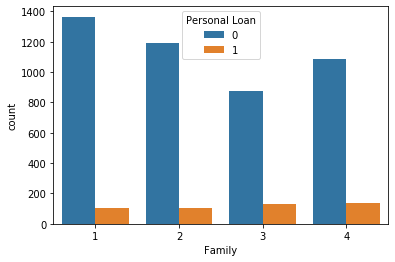

In [87]:
sns.countplot(x='Family',data=df1,hue='Personal Loan')

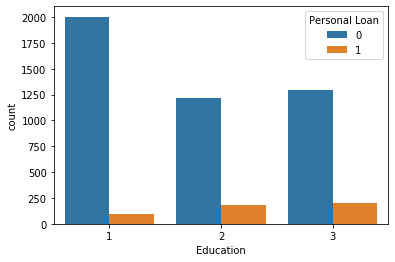

In [88]:
sns.countplot(x='Education',data=df1,hue='Personal Loan')

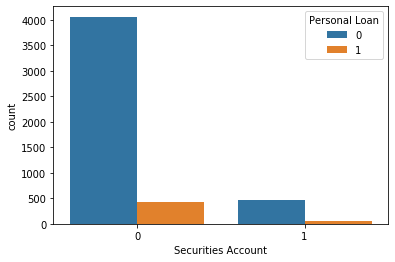

In [89]:
sns.countplot(x='Securities Account',data=df1,hue='Personal Loan')

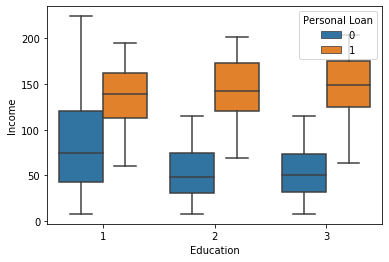

In [90]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df1)

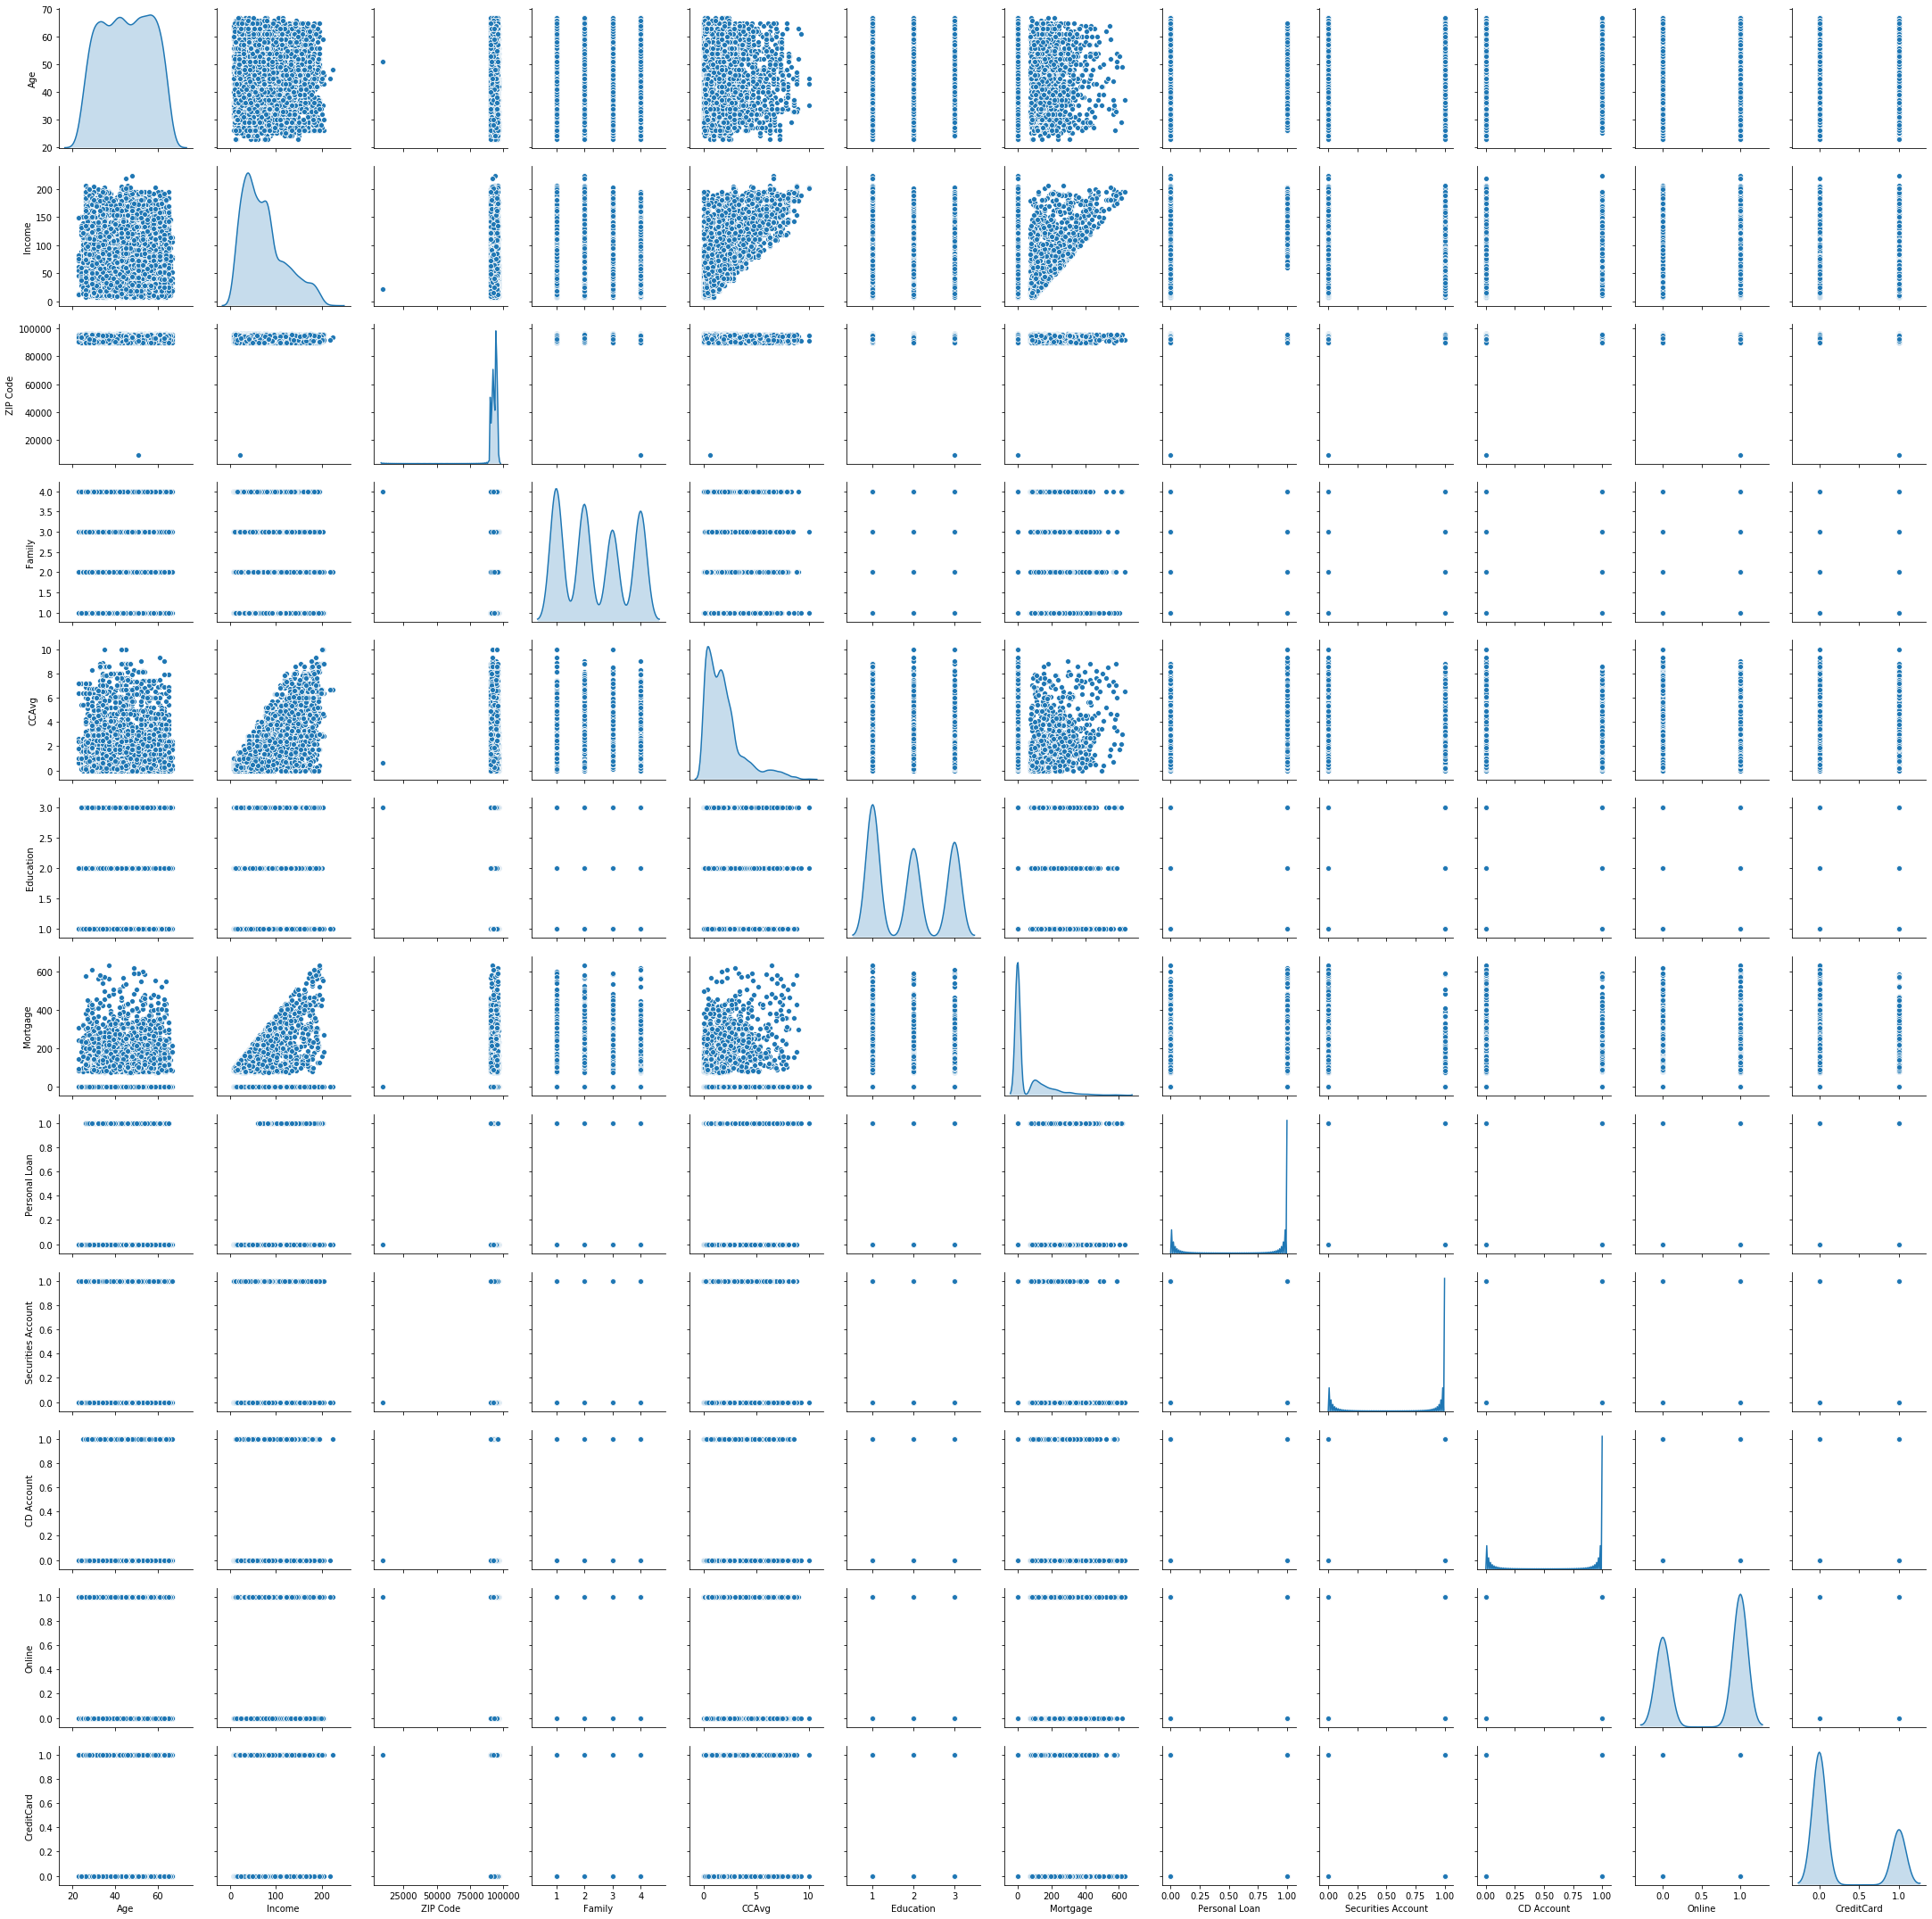

In [91]:
sns.pairplot(df1,diag_kind='kde')

## TRANSFORMATION

In [92]:
x = df1.drop(['Personal Loan'], axis=1)
y = df1['Personal Loan']

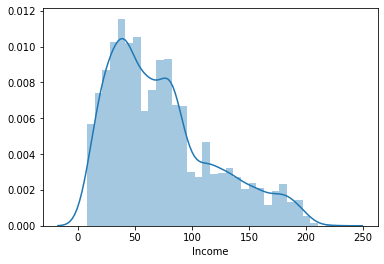

In [93]:
power = PowerTransformer(method='yeo-johnson',standardize=False)
power.fit(x['Income'].values.reshape(-1,1))
temp = power.transform(x['Income'].values.reshape(-1,1))

sns.distplot(x['Income'])
plt.show()

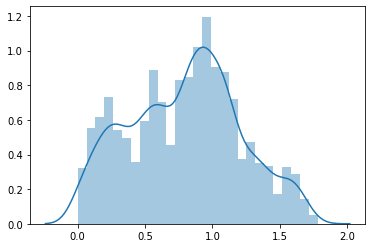

In [94]:
power.fit(x["CCAvg"].values.reshape(-1,1))
temp = power.transform(x["CCAvg"].values.reshape(-1,1))
sns.distplot(temp)

## Splitting data into Training and test set in the ratio of 70:30

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=1)

In [96]:
x_train

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,35,94304,2,1.30,1,0,0,0,1,0
4768,38,39,93118,1,2.00,2,0,0,0,1,0
65,59,131,91360,1,3.80,1,0,0,0,1,1
177,29,65,94132,4,1.80,2,244,0,0,0,0
4489,39,21,95518,3,0.20,2,0,0,0,1,0
3889,26,19,93014,1,0.10,2,121,0,0,1,0
1922,39,25,93023,1,1.40,3,0,0,0,0,0
26,40,83,95064,4,0.20,3,0,0,0,0,0
2458,46,72,93108,2,0.80,3,0,0,0,1,1
525,64,79,94024,2,2.80,1,179,0,0,0,0


In [97]:
x_test

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2764,31,84,91320,1,2.90,3,105,0,0,0,1
4767,35,45,90639,3,0.90,1,101,1,0,0,0
3814,34,35,94304,3,1.30,1,0,0,0,0,0
3499,49,114,94550,1,0.30,1,286,0,0,1,0
2735,36,70,92131,3,2.60,2,165,0,0,1,0
3922,31,20,95616,4,1.50,2,0,0,0,1,0
2701,50,55,94305,1,1.60,2,0,0,0,1,0
1179,36,98,90291,3,1.20,3,0,1,0,0,1
932,51,112,94720,3,1.80,2,0,1,1,1,1
792,41,98,93117,1,4.00,3,0,0,0,0,1


In [98]:
y_train

1334    0
4768    0
65      0
177     0
4489    0
3889    0
1922    0
26      0
2458    0
525     0
3590    0
1253    0
2661    0
1145    0
4856    0
321     1
1988    0
664     0
1906    0
2223    0
2105    0
3713    0
2019    0
332     0
4130    0
2823    0
2750    0
2404    0
598     0
4514    0
       ..
2561    1
1337    1
3606    0
2877    0
4415    0
1031    0
1110    0
1888    0
3550    0
1527    0
753     0
3049    0
2628    0
562     0
4764    0
3562    1
252     0
2516    0
2962    0
4453    0
1202    0
3462    0
2797    0
4225    0
144     0
2895    0
2763    0
905     0
3980    0
235     0
Name: Personal Loan, Length: 3500, dtype: int64

In [99]:
y_test

2764    0
4767    0
3814    0
3499    0
2735    0
3922    0
2701    0
1179    0
932     0
792     0
1852    0
1185    0
1724    0
4080    0
3823    0
4054    0
2721    1
3903    0
1865    0
759     0
2416    0
3670    0
4838    0
3090    0
1546    0
1132    0
4703    0
4494    1
2775    0
3185    0
       ..
3641    0
829     0
788     0
1550    0
3362    0
3634    0
2008    0
2890    0
456     0
4008    1
1433    0
3651    1
1012    0
3505    0
1128    1
4682    0
1105    1
4748    0
398     0
4534    0
797     0
4495    0
4972    0
2925    0
3836    0
4140    0
3969    0
2535    0
1361    0
1458    0
Name: Personal Loan, Length: 1500, dtype: int64

Feature Scaling library

In [100]:
std= StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.fit_transform(x_test)
x_train,x_test

(array([[ 0.13597665, -0.83705838,  0.50880446, ..., -0.25835623,
          0.83164805, -0.650648  ],
        [-0.64621189, -0.75040637, -0.01612016, ..., -0.25835623,
          0.83164805, -0.650648  ],
        [ 1.1788947 ,  1.24258976, -0.79421247, ..., -0.25835623,
          0.83164805,  1.53692933],
        ...,
        [ 0.04906681, -0.98869939,  0.69292642, ..., -0.25835623,
          0.83164805,  1.53692933],
        [ 0.04906681,  0.3327437 , -0.12765557, ..., -0.25835623,
          0.83164805, -0.650648  ],
        [-0.64621189, -0.05719032,  0.69292642, ..., -0.25835623,
          0.83164805, -0.650648  ]]),
 array([[-1.24279042,  0.21682735, -1.03935955, ..., -0.2420216 ,
         -1.25064086,  1.58003275],
        [-0.89052556, -0.63624952, -1.42655513, ..., -0.2420216 ,
         -1.25064086, -0.63289827],
        [-0.97859178, -0.85498718,  0.65725076, ..., -0.2420216 ,
         -1.25064086, -0.63289827],
        ...,
        [ 0.43046766, -1.16121991, -1.63408286, ..., -

## LOGISTIC REGRESSION MODEL

     

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target
variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible 
classes.
Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML 
algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, 
cancer detection etc.


All the libraries are already imported in the beginning. so, no need to import the library of logistic regression model 
here. 
Now we have to create the object for this model nd fit the data in it.

In [101]:
log_model= LogisticRegression()
log_model.fit(x_train, y_train)


C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
# Make prediction:
log_pred = log_model.predict(x_test)


CONFUSION MATRIX

In [103]:
conf = metrics.confusion_matrix(y_test, log_pred)
print(conf)
score = log_model.score(x_test, y_test)

[[1333   18]
 [  61   88]]


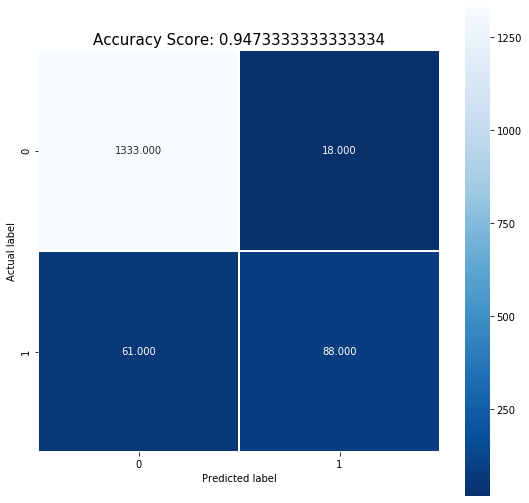

In [104]:

plt.figure(figsize=(9,9))
sns.heatmap(conf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


In [105]:

# Classification Report

cls=classification_report(y_test,log_pred)
print('classification report : ', cls)
print('______________________________________________________________________________________________________________')

# Accuracy score
print('\n')
Acc= accuracy_score(y_test,log_pred)
print('Accuracy  of the model using Logistic Regression is :', Acc*100,'%')


classification report :                precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.83      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

______________________________________________________________________________________________________________


Accuracy  of the model using Logistic Regression is : 94.73333333333333 %


## DECISION TREE 

In general, Decision tree analysis is a predictive modelling tool that can be applied across many areas. Decision trees can be constructed by an algorithmic approach that can split the dataset in different ways based on different conditions. Decisions trees are the most powerful algorithms that falls under the category of supervised algorithms.

    

creating object for this classifier nd fit data into it.

In [106]:
cls = DecisionTreeClassifier()
cls.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [107]:
# Make prediction
dec_pred = cls.predict(x_test)

#classification Report

dec_cls = classification_report(y_test,dec_pred)
print('classification report : ', dec_cls)
print('______________________________________________________________________________________________________________')

#Accuracy report
print('\n')
dec_accuracy = accuracy_score(y_test, dec_pred)
print('Accuracy of the model using Decision Tree Classifier is :', (dec_accuracy*100),'%')


classification report :                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.87      0.89      0.88       149

    accuracy                           0.98      1500
   macro avg       0.93      0.94      0.93      1500
weighted avg       0.98      0.98      0.98      1500

______________________________________________________________________________________________________________


Accuracy of the model using Decision Tree Classifier is : 97.6 %


## RANDOM FOREST CLASSIFIER
 
 
 Random forest is a supervised learning algorithm which is used for both classification as well as regression. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.
   

In [108]:
# creating instance 
rfc=RandomForestClassifier(100)
# fitting data 
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
# Make prediction.
rfc_pred = rfc.predict(x_test)


#classification Report

rfc_cls = classification_report(y_test, rfc_pred)
print('classification report : ', rfc_cls)
print('______________________________________________________________________________________________________________')

#Accuracy report
print('\n')
rfc_accuracy = accuracy_score(y_test, rfc_pred)
print('Accuracy of the model using Random Forest  Classifier is :', (rfc_accuracy*100),'%')


classification report :                precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.98      0.82      0.89       149

    accuracy                           0.98      1500
   macro avg       0.98      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500

______________________________________________________________________________________________________________


Accuracy of the model using Random Forest  Classifier is : 98.0 %


## NAIVE BAYES
   Naïve Bayes algorithms is a classification technique based on applying Bayes’ theorem with a strong assumption that 
   all the predictors are independent to each other. In simple words, the assumption is that the presence of a feature 
   in a class is independent to the presence of any other feature in the same class. 
    

In [110]:

# creating instance and fit data in it
naive = GaussianNB()
naive.fit(x_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [111]:
# make predictions

prediction = naive.predict(x_test)
#classification Report

naive_cls = classification_report(y_test, prediction)
print('classification report : ', naive_cls)
print('______________________________________________________________________________________________________________')

#Accuracy report
print('\n')
naive_accuracy = accuracy_score(y_test, prediction)
print('Accuracy of the model using Naive Classifier is :',(naive_accuracy*100),'%')


classification report :                precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.38      0.52      0.44       149

    accuracy                           0.87      1500
   macro avg       0.66      0.72      0.68      1500
weighted avg       0.89      0.87      0.88      1500

______________________________________________________________________________________________________________


Accuracy of the model using Naive Classifier is : 86.86666666666667 %


##  K- NEAREST NEIGHBORS (KNN):

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −

Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.
     
     

In [112]:
# create instance of KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [113]:
# Make prediction.
knn_predictions = knn.predict(x_test)

#classification Report

knn_cls = classification_report(y_test, knn_predictions)
print('classification report : ', knn_cls)
print('______________________________________________________________________________________________________________')

#Accuracy report
print('\n')
knn_accuracy = accuracy_score(y_test, knn_predictions)
print('Accuracy of the model using KNN Classifier is :', (knn_accuracy*100),'%')


classification report :                precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.87      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.91      0.78      0.83      1500
weighted avg       0.95      0.95      0.94      1500

______________________________________________________________________________________________________________


Accuracy of the model using KNN Classifier is : 94.93333333333334 %


## NEURAL NETWORK
   Neural networks are a class of machine learning algorithms used to model complex patterns in datasets using 
   multiple hidden layers and non-linear activation functions. Each neuron's coefficients (weights) are then
   adjusted relative to how much they contributed to the total error.


In [114]:
#fitting the model
neural = MLPClassifier(random_state=0,max_iter=300)
neural.fit(x_train,y_train)

C:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [115]:
# Make prediction.
neural_predictions = neural.predict(x_test)

#classification Report

neural_cls = classification_report(y_test, neural_predictions)
print('classification report : ', neural_cls)
print('______________________________________________________________________________________________________________')

#Accuracy report
print('\n')
neural_accuracy = accuracy_score(y_test, neural_predictions)
print('Accuracy of the model using Neural Network Classifier is :', (neural_accuracy*100),'%')


classification report :                precision    recall  f1-score   support

           0       0.98      0.99      0.98      1351
           1       0.92      0.79      0.85       149

    accuracy                           0.97      1500
   macro avg       0.95      0.89      0.92      1500
weighted avg       0.97      0.97      0.97      1500

______________________________________________________________________________________________________________


Accuracy of the model using Neural Network Classifier is : 97.26666666666667 %


## COMPARISON

In [116]:
print('ACCURACY OF MODELS ON TEST SET ')
print('\n')
print('--------------------------------------------------------------------------------')
print('logistic regression classifier  : ',Acc)
print('--------------------------------------------------------------------------------')
print('Decision Tree Classifier : ',dec_accuracy)
print('--------------------------------------------------------------------------------')
print('Random Forest  Classifier  : ',rfc_accuracy)
print('--------------------------------------------------------------------------------')
print('KNN Classifier : ',knn_accuracy)
print('--------------------------------------------------------------------------------')
print('Naive Bayes Classifier is : ',naive_accuracy)
print('--------------------------------------------------------------------------------')
print('Neural Network Classifier : ' , neural_accuracy)
print('--------------------------------------------------------------------------------')

ACCURACY OF MODELS ON TEST SET 


--------------------------------------------------------------------------------
logistic regression classifier  :  0.9473333333333334
--------------------------------------------------------------------------------
Decision Tree Classifier :  0.976
--------------------------------------------------------------------------------
Random Forest  Classifier  :  0.98
--------------------------------------------------------------------------------
KNN Classifier :  0.9493333333333334
--------------------------------------------------------------------------------
Naive Bayes Classifier is :  0.8686666666666667
--------------------------------------------------------------------------------
Neural Network Classifier :  0.9726666666666667
--------------------------------------------------------------------------------


## CONCLUSION 

From the above camparison ,we can conclude that RANDOM FOREST CLASSIFIER MODEL  perform the best.